Last edit: 2024-07-23
# Example notebook, more compact
In this example notenbook, the same example data is processed, but in a more compact fashion and with `debug=False`. This is useful when you already know that your setting work well for the recorded dataset and you just want to process a folder full of files, without getting a lot of debug-messages for each file.

In [1]:
# To locate the resources
from importlib import resources
# To read-in the raw data
import h5py
# To have the plots inline
import matplotlib.pyplot as plt

import parrot

Activate inline plotting (can be changed to `%matplotlib qt5` or `%matplotlib notebook`)

In [2]:
%matplotlib inline

Check if example files in `example_data` are available, otherwise download from zenodo.org

In [3]:
parrot.example.init.initialize()

###
Found correct file: light.h5.
###
Found correct file: dark1.h5.
###
Found correct file: dark2.h5.


In [4]:
def get_data(file_name):
    """We load the downloaded example files inside the parrot-module."""
    my_file = (resources.files(parrot.example.example_data) / file_name)
    with h5py.File(my_file, "r") as f:
        time = f["time"][:]
        position = f["position"][:]
        signal = f["signal"][:]
        data_dict = {"time": time, "position": position, "signal": signal}
    return data_dict

light = get_data("light.h5")
dark1 = get_data("dark1.h5")
dark2 = get_data("dark2.h5")

In [5]:
scale = 50e-12 / 20
data = parrot.process.thz_and_two_darks(light, 
                                        dark1, 
                                        dark2, 
                                        scale=scale, 
                                        debug=False)

In [6]:
data = parrot.post_process_data.correct_systematic_errors(data)
data = parrot.post_process_data.window(data)
data = parrot.post_process_data.pad_zeros(data)

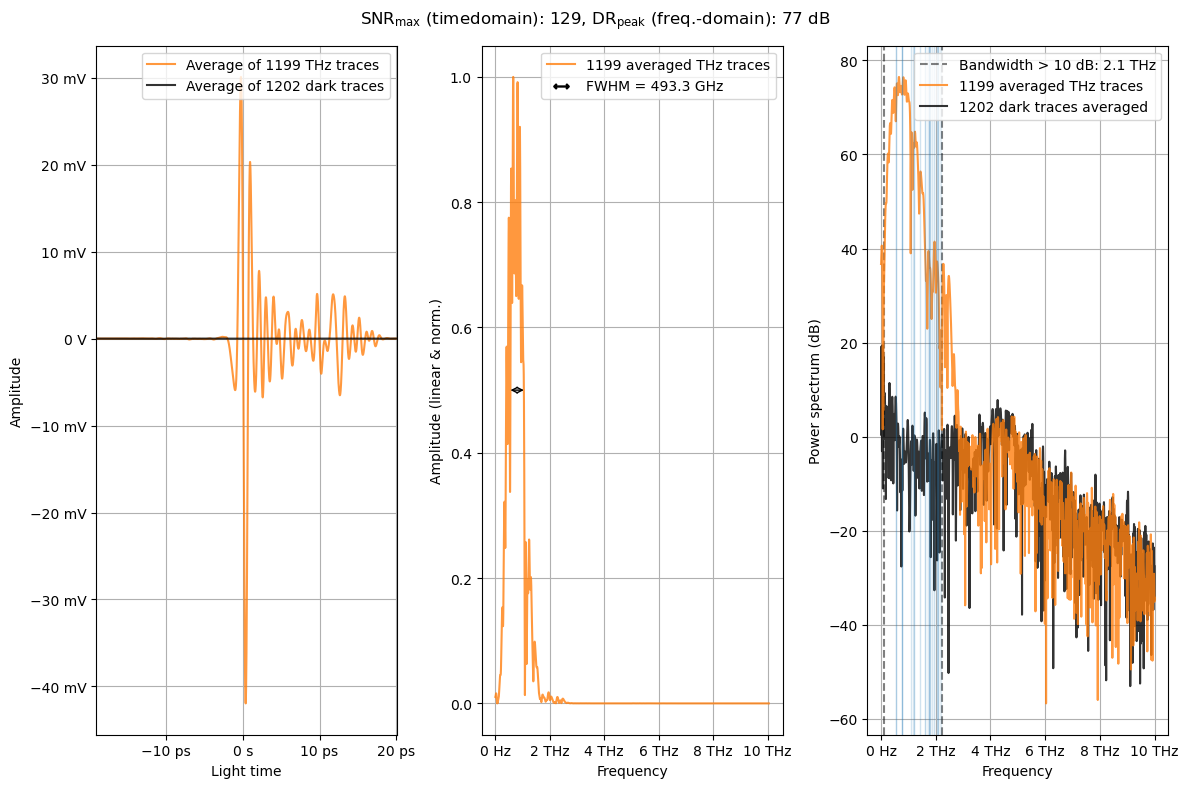

In [7]:
parrot.plot.simple_multi_cycle(data, vertical_stacked_plots=False)

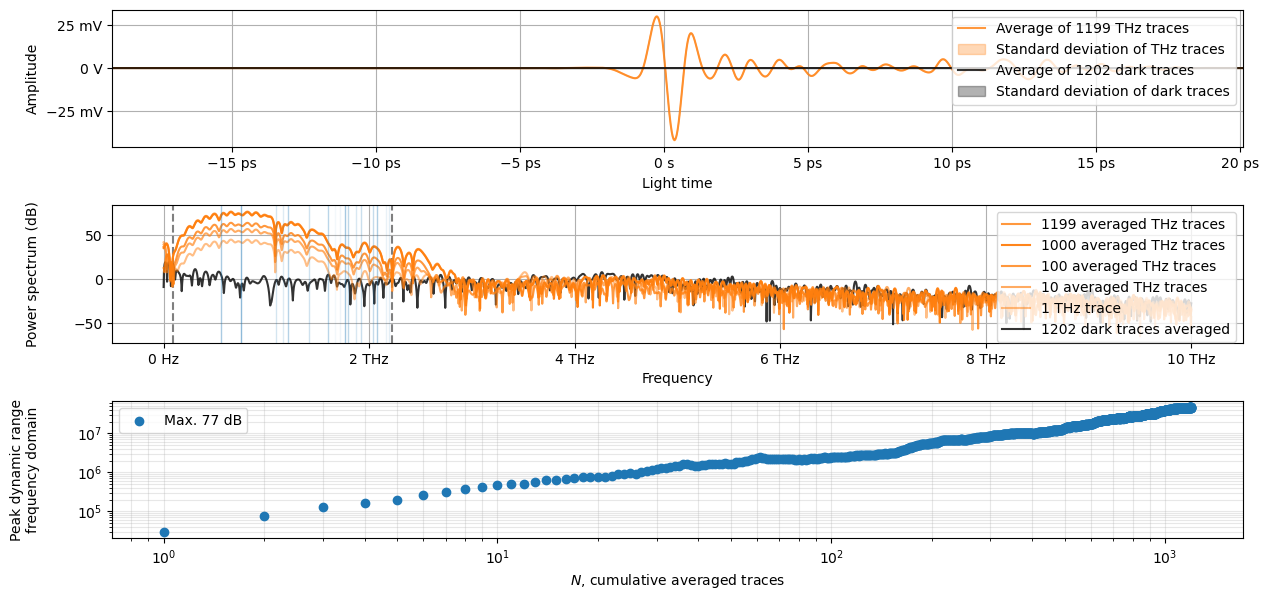

In [8]:
parrot.plot.extended_multi_cycle(data)